In [1]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_iris
# from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np
# from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm


In [ ]:
# 1. pasidaryti dataframus
# 2.suskaiciuoti bendra valandos suvartojima
# 3.sujungti lenteles ir gauta bendra vartojima
# 4. pasiimti meteo duomenis (3men) ir pasipildyti bendra lentele
# 5. sukurti modelius ir palyginti

In [2]:
df1_full = pd.read_excel('../../../eismas/b2b_gv_vartojimas.xlsx')
df1_full.head(2)

,data_valanda,0,1,2,3,4,5,6,7,8,...,753,754,755,756,757,758,759,760,761,762
0,2022-11-01 00:00:00,0.0,0.0,4.68,0.001,0.0,0.0,1.7159,1.9334,1.4671,...,5.0,0.4199,23.40,0.0,0.0,5.9883,91.9,0.3135,6.9318,2.8310
1,2022-11-01 01:00:00,0.0,0.0,4.34,0.001,0.0,0.0,1.0673,0.5732,1.1481,...,4.7,0.3783,22.44,0.0,0.0,5.2497,90.5,0.2949,5.3964,2.8309


In [3]:
df1_full = df1_full.rename(columns={'data_valanda': 'datetime'})
df1_full['datetime'] = pd.to_datetime(df1_full['datetime'])
df1_full['vartojimas1'] = df1_full.drop('datetime', axis=1).sum(axis=1)
df1_full.tail(2)

,datetime,0,1,2,3,4,5,6,7,8,...,754,755,756,757,758,759,760,761,762,vartojimas1
8758,2023-10-31 23:00:00,4.463,0.0,11.846,0.001,0.049,0.119,1.6896,0.245,3.421,...,0.439,36.734,3.653,3.171,6.235,104.722,0.436,8.2,5.566,6861.757278
8759,2023-11-01 00:00:00,4.699,0.0,11.992,0.001,0.046,0.109,1.1057,0.776,0.256,...,0.422,38.616,3.372,3.147,4.212,101.005,0.425,9.2,5.559,6825.195092


In [4]:
start_date = '2023-08-01'
end_date = '2023-10-31'
df1 = df1_full[(df1_full['datetime'] >= start_date) & (df1_full['datetime'] < end_date)][['datetime', 'vartojimas1']]
df1.head()

,datetime,vartojimas1
6551,2023-08-01 00:00:00,6521.908655
6552,2023-08-01 01:00:00,6425.875569
6553,2023-08-01 02:00:00,6302.521053
6554,2023-08-01 03:00:00,6237.295838
6555,2023-08-01 04:00:00,6524.418959


In [5]:
df2_full = pd.read_excel('../../../eismas/b2b_ngv_vartojimas.xlsx')
df2_full.head(2)

,data_valanda,0,1,2,3,4,5,6,7,8,...,789,790,791,792,793,794,795,796,797,798
0,2022-11-01 00:00:00,0.0,0,0.014,0.018,0.0,0.0,0.014,0.049,0.0,...,0.034,0.335,0.0,0.0,0.0,0.0,0.0,0.071,0.0,0.459
1,2022-11-01 01:00:00,0.0,0,0.013,0.018,0.0,0.0,0.013,0.048,0.0,...,0.033,0.335,0.0,0.0,0.0,0.0,0.0,0.039,0.0,0.437


In [6]:
df2_full = df2_full.rename(columns={'data_valanda': 'datetime'})
df2_full['datetime'] = pd.to_datetime(df2_full['datetime'])
df2_full['vartojimas2'] = df2_full.drop('datetime', axis=1).sum(axis=1)

In [7]:
start_date = '2023-08-01'
end_date = '2023-10-31'
df2 = df2_full[(df2_full['datetime'] >= start_date) & (df2_full['datetime'] < end_date)][['datetime', 'vartojimas2']]
df2.tail(2)

,datetime,vartojimas2
8733,2023-10-30 22:00:00,467.213334
8734,2023-10-30 23:00:00,434.948666


In [8]:
df3_full = pd.read_excel('../../../eismas/b2c_gv_vartojimas.xlsx')
df3_full.head(2)

,dateTime,0,1,2,3,4,5,6,7,8,...,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049
0,2023-08-01 00:00:00,1.128,0.301,0.078,0.083,0.306,0.239,0.666,1.050,0.284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-08-01 01:00:00,1.465,0.262,0.095,0.090,0.303,0.214,0.696,0.467,0.263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df3_full = df3_full.rename(columns={'dateTime': 'datetime'})
df3_full['datetime'] = pd.to_datetime(df3_full['datetime'])
df3_full['vartojimas3'] = df3_full.drop('datetime', axis=1).sum(axis=1)

In [10]:
start_date = '2023-08-01'
end_date = '2023-10-31'
df3 = df3_full[(df3_full['datetime'] >= start_date) & (df3_full['datetime'] < end_date)][['datetime', 'vartojimas3']]
df3.head(2)

,datetime,vartojimas3
0,2023-08-01 00:00:00,495.554135
1,2023-08-01 01:00:00,404.980188


In [11]:
df4_full = pd.read_excel('../../../eismas/b2c_ngv_vartojimas.xlsx')
df4_full.head(2)

,dateTime,0,1,2,3,4,5,6,7,8,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025
0,2023-08-01 00:00:00,0.117,0.103,0.041,0.07,0.126,0.048,0.131,0.171,0.347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-08-01 01:00:00,0.501,0.043,0.046,0.12,0.104,0.051,0.110,0.210,0.963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df4_full = df4_full.rename(columns={'dateTime': 'datetime'})
df4_full['datetime'] = pd.to_datetime(df4_full['datetime'])
df4_full['vartojimas4'] = df4_full.drop('datetime', axis=1).sum(axis=1)

In [13]:
start_date = '2023-08-01'
end_date = '2023-10-31'
df4 = df4_full[(df4_full['datetime'] >= start_date) & (df4_full['datetime'] < end_date)][['datetime', 'vartojimas4']]
df4.tail(2)

,datetime,vartojimas4
2182,2023-10-30 22:00:00,252.092667
2183,2023-10-30 23:00:00,190.161001


In [14]:
# lentelių jungimas
merged_energy = pd.merge(df1, df2, on='datetime', how='inner')
merged_energy = pd.merge(merged_energy, df3, on='datetime', how='inner')
merged_energy = pd.merge(merged_energy, df4, on='datetime', how='inner')
merged_energy.tail(2)


,datetime,vartojimas1,vartojimas2,vartojimas3,vartojimas4
2182,2023-10-30 22:00:00,8509.173646,467.213334,952.857967,252.092667
2183,2023-10-30 23:00:00,7839.197448,434.948666,811.025201,190.161001


In [15]:
merged_energy['vartojimas'] = merged_energy.drop('datetime', axis=1).sum(axis=1)
merged_energy.tail(2)

,datetime,vartojimas1,vartojimas2,vartojimas3,vartojimas4,vartojimas
2182,2023-10-30 22:00:00,8509.173646,467.213334,952.857967,252.092667,10181.337614
2183,2023-10-30 23:00:00,7839.197448,434.948666,811.025201,190.161001,9275.332316


In [16]:
merged_e = merged_energy[['datetime', 'vartojimas']]

In [17]:
orai = pd.read_csv('../../../eismas/VMSaug1-oct30.csv')
orai.head(2)

,obs_time_utc,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,condition_code
0,2023-08-01 00:00:00,14.8,14.8,2.1,3.2,165,25.0,1007.7,82,0.0,partly-cloudy
1,2023-08-01 01:00:00,13.8,13.8,1.5,2.6,150,25.0,1008.0,87,0.0,partly-cloudy


In [18]:
orai = orai.rename(columns={'obs_time_utc': 'datetime'})
orai['datetime'] = pd.to_datetime(orai['datetime'])

In [19]:
data = pd.merge(merged_e, orai, on='datetime', how='inner')
data.tail(2)

,datetime,vartojimas,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,condition_code
2182,2023-10-30 22:00:00,10181.337614,6.8,6.8,1.8,3.2,147,75.0,1009.4,99,0.0,mist
2183,2023-10-30 23:00:00,9275.332316,6.4,6.4,2.2,3.1,121,0.0,1009.4,100,0.0,fog


In [20]:
l = LabelEncoder().fit_transform(data['condition_code'])
data['condition_code'] = l
data.head(2)

,datetime,vartojimas,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,condition_code
0,2023-08-01 00:00:00,7528.222124,14.8,14.8,2.1,3.2,165,25.0,1007.7,82,0.0,10
1,2023-08-01 01:00:00,7300.200090,13.8,13.8,1.5,2.6,150,25.0,1008.0,87,0.0,10


In [21]:
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['weekay'] = data['datetime'].dt.day_of_week
data['month'] = data['datetime'].dt.month

In [22]:
data.dropna(inplace=True)

In [23]:
data_train_full = data.iloc[:-24]
# data_train.tail(3)
data_test = data.iloc[-24:]
data_test.tail(2)

,datetime,vartojimas,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,condition_code,hour,day,weekay,month
2182,2023-10-30 22:00:00,10181.337614,6.8,6.8,1.8,3.2,147,75.0,1009.4,99,0.0,9,22,30,0,10
2183,2023-10-30 23:00:00,9275.332316,6.4,6.4,2.2,3.1,121,0.0,1009.4,100,0.0,3,23,30,0,10


In [24]:
data_train_full.corr()

,datetime,vartojimas,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,condition_code,hour,day,weekay,month
datetime,1.000000,0.326637,-0.711805,-0.713207,0.207553,0.224277,0.045788,0.261766,-0.183731,0.330803,-0.001381,0.050723,0.007761,0.288035,0.051104,0.942709
vartojimas,0.326637,1.000000,-0.277434,-0.279219,0.105936,0.134844,-0.084519,0.273856,-0.245445,0.205765,0.062049,0.063695,0.121159,0.168074,-0.393360,0.282652
air_temperature,-0.711805,-0.277434,1.000000,0.995502,0.059448,0.035532,-0.043735,-0.299934,0.186103,-0.708023,-0.034228,-0.046200,0.113575,-0.075643,-0.038181,-0.719231
feels_like_temperature,-0.713207,-0.279219,0.995502,1.000000,0.040671,0.016252,-0.032630,-0.303864,0.201511,-0.689069,-0.031648,-0.050734,0.108469,-0.088078,-0.044486,-0.716387
wind_speed,0.207553,0.105936,0.059448,0.040671,1.000000,0.914806,0.110287,0.224887,-0.431828,-0.275108,0.027063,0.123556,0.001462,-0.145377,0.015930,0.268847
wind_gust,0.224277,0.134844,0.035532,0.016252,0.914806,1.000000,0.146327,0.293824,-0.476524,-0.261513,0.103724,0.191614,0.039012,-0.133197,0.017406,0.282295
wind_direction,0.045788,-0.084519,-0.043735,-0.032630,0.110287,0.146327,1.000000,0.043024,0.071834,-0.081900,-0.005260,0.075802,0.002054,-0.161429,-0.024025,0.104341
cloud_cover,0.261766,0.273856,-0.299934,-0.303864,0.224887,0.293824,0.043024,1.000000,-0.494995,0.308923,0.161375,0.170211,-0.058487,0.026867,0.010317,0.268187
sea_level_pressure,-0.183731,-0.245445,0.186103,0.201511,-0.431828,-0.476524,0.071834,-0.494995,1.000000,-0.207335,-0.166471,-0.239954,-0.004944,-0.069593,-0.060722,-0.172275
relative_humidity,0.330803,0.205765,-0.708023,-0.689069,-0.275108,-0.261513,-0.081900,0.308923,-0.207335,1.000000,0.168865,0.057171,-0.188412,0.132493,0.007377,0.302871


In [25]:
data_train_full.columns

Index(['datetime', 'vartojimas', 'air_temperature', 'feels_like_temperature',
       'wind_speed', 'wind_gust', 'wind_direction', 'cloud_cover',
       'sea_level_pressure', 'relative_humidity', 'precipitation',
       'condition_code', 'hour', 'day', 'weekay', 'month'],
      dtype='object')

In [26]:
data_train = data_train_full[['datetime', 'vartojimas', 'air_temperature', 'cloud_cover',
       'sea_level_pressure', 'relative_humidity', 'hour', 'day', 'weekay', 'month']]

In [27]:
# Linear Regression
X = data_train.drop(columns=['vartojimas', 'datetime' ])
y = data_train['vartojimas'].values      # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fit = LinearRegression().fit(X_train, y_train)
y_pred = fit.predict(X_test)
fit_score = fit.score(X_test, y_test) *100.0
print(f'fit score: {fit_score}')

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

fit score: 36.77420730661611
Mean Squared Error: 5788494.968123016


In [28]:
# forest
X = data_train.drop(columns=['vartojimas', 'datetime' ])
y = data_train['vartojimas'].values      # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
forest_score = forest.score(X_test, y_test) *100.0
print(f'forest score: {forest_score}')

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

forest score: 95.62785790452838
Mean Squared Error: 400281.61674918054


In [29]:
# tree
X = data_train.drop(columns=['vartojimas', 'datetime' ])
y = data_train['vartojimas'].values      # target  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=23)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
tree_reg_score = forest.score(X_test, y_test) *100.0
print(f'fit score: {tree_reg_score}')

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

fit score: 95.62785790452838
Mean Squared Error: 910874.7868276999


In [30]:
# poly
X = data_train.drop(columns=['vartojimas', 'datetime' ])
y = data_train['vartojimas'].values      # target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

polynomial_features = PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X) # į polinominius x'us

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
fit_poly_score = fit.score(X_test, y_test) *100.0
print(f'fit score: {fit_poly_score}')

# mse = mean_squared_error(y_test, y_poly_pred)
# print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = model.score(x_poly, y)
print('rmse', rmse, 'r2', r2, sep='\t')

fit score: 36.77420730661611
rmse	1062.9978097471994	r2	0.883557677335185


In [44]:
# SupportVectorMachine
X = data_train.drop(columns=['vartojimas', 'datetime' ])
y = data_train['vartojimas'].values      # target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = svm.SVR(kernel='sigmoid') #regresorius čia!
model.fit(X, y)
# Predict using the SVM model
y_pred = model.predict(X)
# Evaluate the predictions
accuracy = model.score(X_test, y_test)
print("Accuracy of SVM:", accuracy)


Accuracy of SVM: -0.036740622755377705


In [56]:
data_test_spejimai = data_test[['air_temperature', 'cloud_cover',
       'sea_level_pressure', 'relative_humidity', 'hour', 'day', 'weekay', 'month']]
data_test_spejimai.head(2)

,air_temperature,cloud_cover,sea_level_pressure,relative_humidity,hour,day,weekay,month
2160,7.0,88.0,1004.6,99,0,30,0,10
2161,7.4,100.0,1004.3,98,1,30,0,10


In [57]:
# Nustatom X ir y ir splittinam
X = data_train.drop(columns=['vartojimas', 'datetime' ])
y = data_train['vartojimas'].values      # target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
#  linear
fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0
y_pred_linear = fit.predict(data_test_spejimai)
# data_test_spejimai['linear'] = y_pred

In [60]:
# forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Make predictions

y_pred_forest = rf.predict(data_test_spejimai)
# data_test_spejimai['treereg']=pred

In [61]:
# treereg
regressor = DecisionTreeRegressor(random_state=23)
regressor.fit(X_train, y_train)
y_pred_treereg = regressor.predict(data_test_spejimai)

In [ ]:
# poly
# polynomial_features = PolynomialFeatures(degree=4)
# x_poly = polynomial_features.fit_transform(X) # į polinominius x'us

# model = LinearRegression()
# model.fit(x_poly, y)
# y_pred_poly = model.predict(x_poly)

In [62]:
# SVR rbf
model = svm.SVR(kernel='rbf') #regresorius čia!
model.fit(X, y)
# Predict using the SVM model
y_pred_rbf = model.predict(data_test_spejimai)


In [64]:
data_test_spejimai['linear'] = y_pred_linear
data_test_spejimai['forest'] = y_pred_forest
data_test_spejimai['treereg'] = y_pred_treereg
data_test_spejimai['SVR_rbf'] = y_pred_rbf
data_test_spejimai.head(2)

,air_temperature,cloud_cover,sea_level_pressure,relative_humidity,hour,day,weekay,month,linear,forest,treereg,SVR_rbf
2160,7.0,88.0,1004.6,99,0,30,0,10,13921.313014,8794.153817,10144.503529,9061.248634
2161,7.4,100.0,1004.3,98,1,30,0,10,14101.938125,8424.440518,7113.380336,9061.745407


In [66]:
data_test_spejimai['datetime'] = data_test['datetime']
data_test_spejimai.head(2)

,air_temperature,cloud_cover,sea_level_pressure,relative_humidity,hour,day,weekay,month,linear,forest,treereg,SVR_rbf,datetime
2160,7.0,88.0,1004.6,99,0,30,0,10,13921.313014,8794.153817,10144.503529,9061.248634,2023-10-30 00:00:00
2161,7.4,100.0,1004.3,98,1,30,0,10,14101.938125,8424.440518,7113.380336,9061.745407,2023-10-30 01:00:00


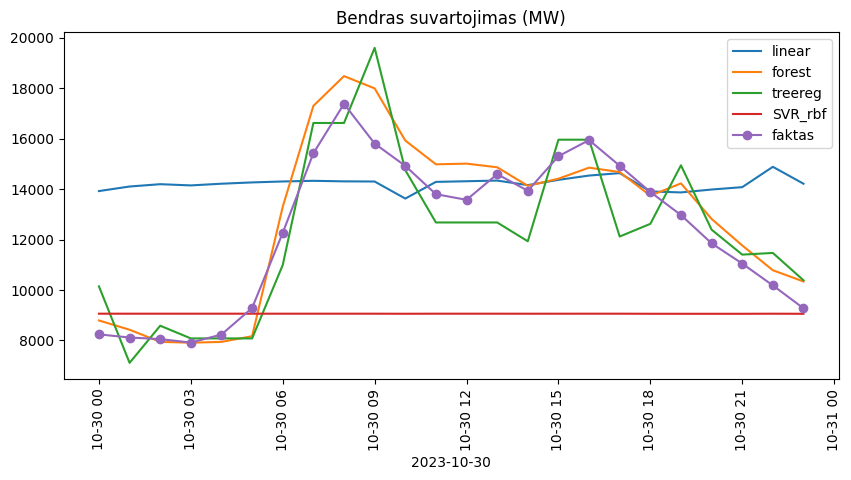

In [68]:
fig, axis = plt.subplots(figsize=(10, 4.5))
axis.plot(data_test_spejimai['datetime'], data_test_spejimai['linear'], label='linear')
axis.plot(data_test_spejimai['datetime'], data_test_spejimai['forest'], label='forest')
axis.plot(data_test_spejimai['datetime'], data_test_spejimai['treereg'], label='treereg')
axis.plot(data_test_spejimai['datetime'], data_test_spejimai['SVR_rbf'], label='SVR_rbf')
axis.plot(data_test['datetime'], data_test['vartojimas'], label='faktas', marker='o')
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.title('Bendras suvartojimas (MW)')
plt.xlabel('2023-10-30')
plt.show()

In [70]:
orai2_full = pd.read_csv('../../../eismas/VMSsausio12.csv')

In [71]:
orai2_full = orai2_full.rename(columns={'obs_time_utc': 'datetime'})
orai2_full['datetime'] = pd.to_datetime(orai2_full['datetime'])
orai2_full['hour'] = orai2_full['datetime'].dt.hour
orai2_full['day'] = orai2_full['datetime'].dt.day
orai2_full['weekay'] = orai2_full['datetime'].dt.day_of_week
orai2_full['month'] = orai2_full['datetime'].dt.month
orai2_full.head(2)

,datetime,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,condition_code,hour,day,weekay,month
0,2025-01-12 00:00:00,-0.9,-2.6,1.4,2.5,165,100,1009.9,96,0.0,cloudy,0,12,6,1
1,2025-01-12 01:00:00,-1.0,-3.2,1.7,3.1,165,100,1010.1,97,0.0,cloudy,1,12,6,1


In [ ]:
# orai2 naudosim sausio 12 dienos energijos vartojimo spejimui
orai2 = orai2_full[['air_temperature', 'cloud_cover',
       'sea_level_pressure', 'relative_humidity', 'hour', 'day', 'weekay', 'month']]
orai2.tail(2)

,air_temperature,cloud_cover,sea_level_pressure,relative_humidity,hour,day,weekay,month
22,-1.2,100,1028.3,88,22,12,6,1
23,-1.2,100,1029.0,86,23,12,6,1


In [75]:
# spejimai
orai_pred_linear = fit.predict(orai2)
orai_pred_forest = rf.predict(orai2)
orai_pred_treereg = regressor.predict(orai2)
orai_pred_rbf = model.predict(orai2)


In [76]:
orai2['linear'] = orai_pred_linear
orai2['forest'] = orai_pred_forest
orai2['treereg'] = orai_pred_treereg
orai2['SVR_rbf'] = orai_pred_rbf
orai2.head(2)

,air_temperature,cloud_cover,sea_level_pressure,relative_humidity,hour,day,weekay,month,linear,forest,treereg,SVR_rbf
0,-0.9,100,1009.9,96,0,12,6,1,2903.033071,11831.980531,9062.407056,9061.612756
1,-1.0,100,1010.1,97,1,12,6,1,2960.543281,11825.515324,8765.439873,9061.621869


In [77]:
orai2['datetime'] = orai2_full['datetime']
orai2.head(2)

,air_temperature,cloud_cover,sea_level_pressure,relative_humidity,hour,day,weekay,month,linear,forest,treereg,SVR_rbf,datetime
0,-0.9,100,1009.9,96,0,12,6,1,2903.033071,11831.980531,9062.407056,9061.612756,2025-01-12 00:00:00
1,-1.0,100,1010.1,97,1,12,6,1,2960.543281,11825.515324,8765.439873,9061.621869,2025-01-12 01:00:00


In [97]:
# nordpool = pd.read_excel('../../../eismas/2025-01-12-NORDPOOL.ods')
nordpool = pd.read_excel('../../../eismas/2025-01-12-NORDPOOLMWh.ods')
nordpool = nordpool.rename(columns={'Unnamed: 0': 'laikas', 'Unnamed: 1': 'suvartojimas'})
nordpool.head(2)

,laikas,suvartojimas
0,Laikas,MWH
1,01:00-02:00,1274.8


In [98]:
nord = nordpool[1:].reset_index(drop=True)
nord.head(2)

,laikas,suvartojimas
0,01:00-02:00,1274.8
1,02:00-03:00,1243.3


In [99]:
# Extract the starting hour from the time interval (before the first dash)
nord['hour'] = nord['laikas'].str.split(' - ').str[0].str[:2]
nord.head(2)

,laikas,suvartojimas,hour
0,01:00-02:00,1274.8,01
1,02:00-03:00,1243.3,02


In [100]:
# Group by hour and sum the energy
nord_gr = nord.groupby('hour')['suvartojimas'].sum().reset_index()

In [101]:
# Generate a datetime range starting from '2025-01-12 00:00:00', with a frequency of 1 hour
nord_gr['datetime'] = pd.date_range(start='2025-01-12 00:00:00', periods=len(nord_gr), freq='H')
nord_gr.head(2)

,hour,suvartojimas,datetime
0,00,1271.5,2025-01-12 00:00:00
1,01,1274.8,2025-01-12 01:00:00


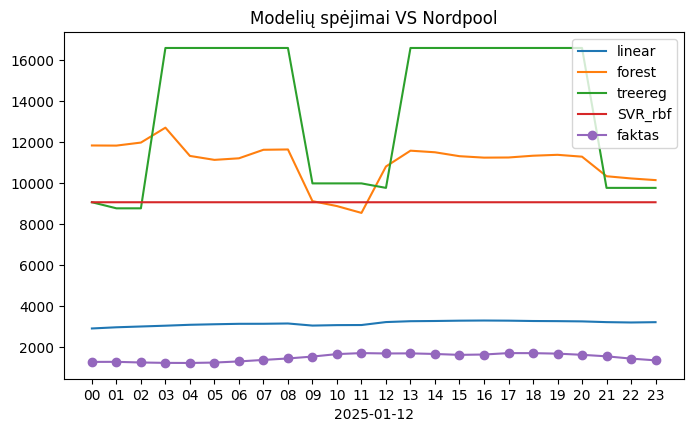

In [115]:
fig, axis = plt.subplots(figsize=(8, 4.5))
axis.plot(orai2['hour'], orai2['linear'], label='linear')
axis.plot(orai2['hour'], orai2['forest'], label='forest')
axis.plot(orai2['hour'], orai2['treereg'], label='treereg')
axis.plot(orai2['hour'], orai2['SVR_rbf'], label='SVR_rbf')
axis.plot(nord_gr['hour'], nord_gr['suvartojimas'], label='faktas', marker='o')
# plt.xticks(ticks=range(0, 24), labels=[f"{i}:00" for i in range(24)])
# plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.title('Modelių spėjimai VS Nordpool')
plt.xlabel('2025-01-12')
plt.savefig('nordpool.png')
plt.show()


In [110]:
plt.savefig('plot.png', dpi=300)  # High-quality image

<Figure size 640x480 with 0 Axes>

In [106]:
import os
os.getcwd()

'c:\\Users\\Lukas\\Documents\\VCS\\DataScienceNotebooks\\Studentai\\Lukas'

In [117]:
from docx import Document
from docx.shared import Inches



In [120]:
document = Document()
document.add_heading('ML modelių prognozės ir Nordpool duomenų palyginimas', 0)
document.add_picture('nordpool.png', width=Inches(6))
document.save('demo1.docx')

In [ ]:
# twinx
# ax = sns.lineplot()
# ax2 = ax.twinx()
# sns.lineplot(ax=ax2)